In [50]:
using HDF5
using PyPlot
include("Grid.jl")
include("Markers.jl")
include("Topo.jl")

get_numerical_time_viscous (generic function with 1 method)

In [51]:
# fname = "Model_Outputs/ModelRun09-08-2023_15:53:04/data.hdf5" # modeul run for 10 - 25km of lambda and hice
# fname = "Model_Outputs/ModelRun09-09-2023_21:41:35/data.hdf5" # model run for 10km hice and 100km lambda
# fname = "Model_Outputs/ModelRun09-10-2023_14:42:33/data.hdf5" #  model run for 10km hice and 100km lambda
# fname = "Model_Outputs/ModelRun09-10-2023_15:33:52/data.hdf5" # model run for 10 - 100km of lambda and hice
fname = "Model_Outputs/ModelRun09-11-2023_14:11:07/data.hdf5"
# Displaying all of the file's information
fid = h5open(fname, "r")

🗂️ HDF5.File: (read-only) Model_Outputs/ModelRun09-11-2023_14:11:07/data.hdf5
└─ 📂 Model Run
   ├─ 🏷️ Description
   ├─ 🔢 Ice Shell Thickness
   ├─ 🔢 Thickening Time
   ├─ 🔢 Viscous Relaxation Time(Half-Space)
   ├─ 🔢 Viscous Relaxation Time(Model)
   └─ 🔢 Wavelength

In [52]:
# Reading Data from file
modeldata = fid["Model Run"];

In [53]:
# Displaying the contents in Model Run group 
for obj in modeldata
    data = read(obj)
    println(obj)
    display(data)
end

# Accessing Model Run contents that I want
Wavelength = read(modeldata,"Wavelength");
Ice_shell = read(modeldata, "Ice Shell Thickness");
Time_halfspace = read(modeldata,"Viscous Relaxation Time(Half-Space)");
Time_rel = read(modeldata,"Viscous Relaxation Time(Model)");
Time_thickening = read(modeldata, "Thickening Time");
# Time_rel_fitted = read(modeldata, "Fitted Viscous Relaxation Time");
# Time_rel_fitted_amp = read(modeldata,"Viscous Relaxation Time with Fitted Amplitude(Model)");

HDF5.Dataset: /Model Run/Ice Shell Thickness (file: Model_Outputs/ModelRun09-11-2023_14:11:07/data.hdf5 xfer_mode: 0)


1-element Vector{Float64}:
 10.0

HDF5.Dataset: /Model Run/Thickening Time (file: Model_Outputs/ModelRun09-11-2023_14:11:07/data.hdf5 xfer_mode: 0)


1×1 Matrix{Float64}:
 2.785910300361167e6

HDF5.Dataset: /Model Run/Viscous Relaxation Time(Half-Space) (file: Model_Outputs/ModelRun09-11-2023_14:11:07/data.hdf5 xfer_mode: 0)


1×1 Matrix{Float64}:
 441.29690315912256

HDF5.Dataset: /Model Run/Viscous Relaxation Time(Model) (file: Model_Outputs/ModelRun09-11-2023_14:11:07/data.hdf5 xfer_mode: 0)


1×1 Matrix{Float64}:
 454510.72767979983

HDF5.Dataset: /Model Run/Wavelength (file: Model_Outputs/ModelRun09-11-2023_14:11:07/data.hdf5 xfer_mode: 0)


1-element Vector{Float64}:
 100.0

In [54]:
# Close file
close(fid)

In [55]:
println("Wavelength: $Wavelength")
println("Ice Shell Thickness: $Ice_shell")
println("Viscous Relaxation Time (Half-Space): $Time_halfspace")
println("Viscous Relaxation Time (Model): $Time_rel")
println("Thickening Time: $Time_thickening")
# println("Fitted Viscous Relaxation Time: $Time_rel_fitted")
# println("Viscous Relaxation Time with Fitted Amplitude(Model): $Time_rel_fitted_amp")

Wavelength: [100.0]
Ice Shell Thickness: [10.0]
Viscous Relaxation Time (Half-Space): [441.29690315912256;;]
Viscous Relaxation Time (Model): [454510.72767979983;;]
Thickening Time: [2.785910300361167e6;;]


In [56]:
vec(Time_thickening) > vec(Time_rel)

true

In [57]:
vec(Time_rel) > vec(Time_halfspace)

true

In [58]:
display(Time_rel/Time_thickening)

1×1 Matrix{Float64}:
 0.16314621745749558

In [59]:
Time_rel/Time_halfspace

1×1 Matrix{Float64}:
 1029.943161681134

In [43]:
# display(Time_rel/Time_rel_fitted_amp)

In [44]:
# display(Time_rel_fitted_amp/Time_halfspace)

In [45]:
# display(transpose(Wavelength)./Ice_shell)

In [46]:
# Time_rel < Time_thickening

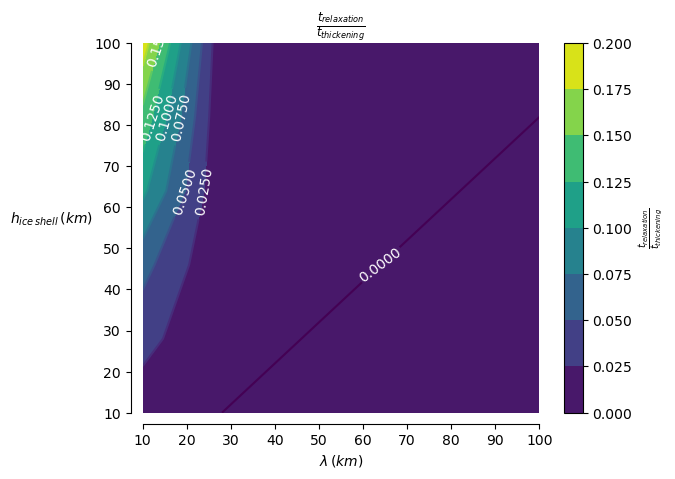

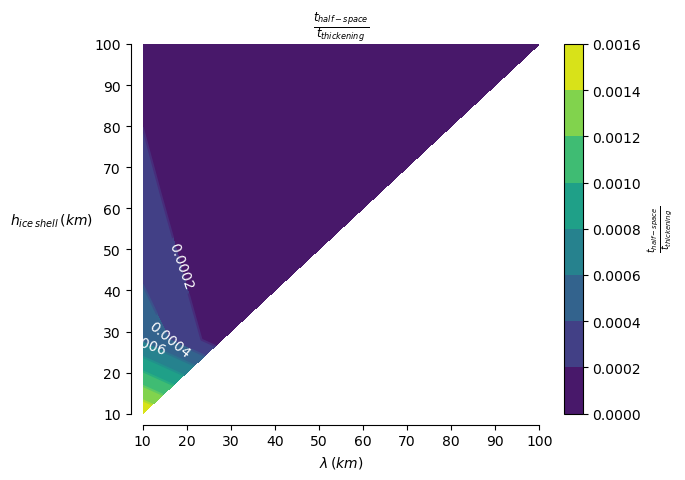

In [47]:
figure()

# cs = contour(Wavelength,Ice_shell,Time_vis/Time_thickening,locator=plt.LogLocator())
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(Wavelength,Ice_shell,Time_vis./Time_thickening,cmap=get_cmap("viridis"))

cs = contour(Wavelength,Ice_shell,Time_rel/Time_thickening)
clabel(cs,inline=true,fmt="%0.4f",colors="w",fontsize=10)
contourf(Wavelength,Ice_shell,Time_rel/Time_thickening,cmap=get_cmap("viridis"))
title(L"\frac{t_{relaxation}}{t_{thickening}}")
colorbar(label=L"\frac{t_{relaxation}}{t_{thickening}}")
gca().set_xlabel(L"\lambda\,(km)")
gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
gca().yaxis.set_label_coords(-0.23,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# gca().spines["top"].set_color("none") # Remove the top axis boundary
# gca().spines["right"].set_color("none") # Remove the right axis boundary
show()

figure()

# cs = contour(Time_halfspace./Time_thickening)
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(Time_halfspace./Time_thickening,cmap=get_cmap("viridis"))

cs = contour(Wavelength,Ice_shell,(Time_halfspace./Time_thickening))
clabel(cs,inline=true,colors="w",fontsize=10)
contourf(Wavelength,Ice_shell,(Time_halfspace./Time_thickening),cmap=get_cmap("viridis"))
title(L"\frac{t_{half-space}}{t_{thickening}}")

colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
gca().set_xlabel(L"\lambda\,(km)")
gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
gca().yaxis.set_label_coords(-0.23,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# gca().spines["top"].set_color("none") # Remove the top axis boundary
# gca().spines["right"].set_color("none") # Remove the right axis boundary
show()

In [48]:
# figure()
# plot(transpose(Wavelength)./Ice_shell,Time_vis/Time_vis_fitted_amp,".-")
# show()

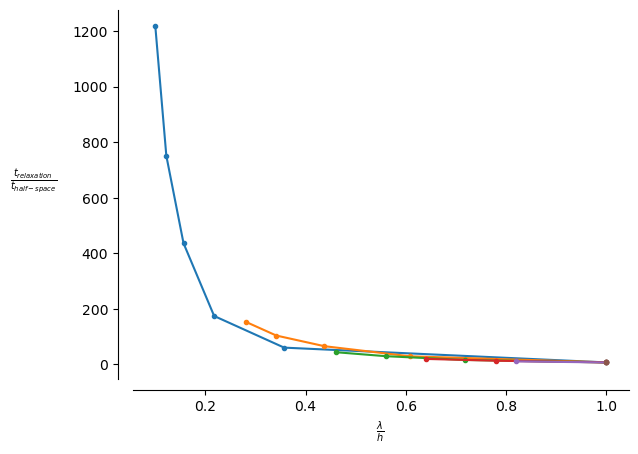

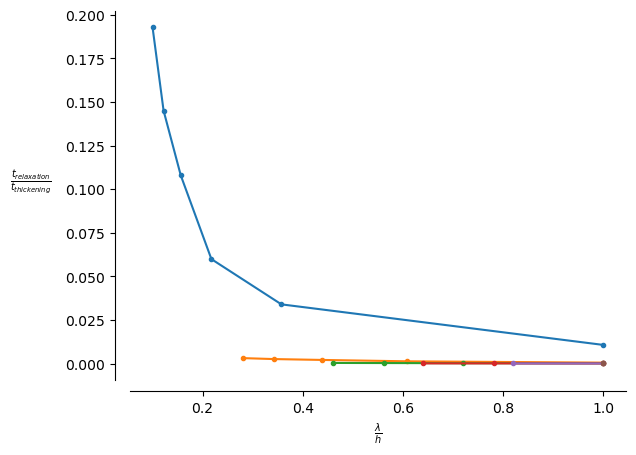

In [49]:
# figure()
# plot(transpose(Wavelength)./Ice_shell,Time_vis_fitted/Time_halfspace,".")
# gca().set_xlabel(L"\frac{\lambda}{h}")
# gca().set_ylabel(L"\frac{t_{relaxation}}{t_{half-space}}",rotation=0)
# gca().yaxis.set_label_coords(-0.17,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()

figure()
plot(transpose(Wavelength)./Ice_shell,Time_rel./Time_halfspace,".-")
gca().set_xlabel(L"\frac{\lambda}{h}")
gca().set_ylabel(L"\frac{t_{relaxation}}{t_{half-space}}",rotation=0)
gca().yaxis.set_label_coords(-0.2,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()

figure()
plot(transpose(Wavelength)./Ice_shell,Time_rel./Time_thickening,".-")
gca().set_xlabel(L"\frac{\lambda}{h}")
gca().set_ylabel(L"\frac{t_{relaxation}}{t_{thickening}}",rotation=0)
gca().yaxis.set_label_coords(-0.2,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()

# figure()
# plot(transpose(Wavelength)./Ice_shell,Time_halfspace./Time_thickening,".-")
# gca().set_xlabel(L"\frac{\lambda}{h}")
# gca().set_ylabel(L"\frac{t_{half-space}}{t_{thickening}}",rotation=0)
# gca().yaxis.set_label_coords(-0.2,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()

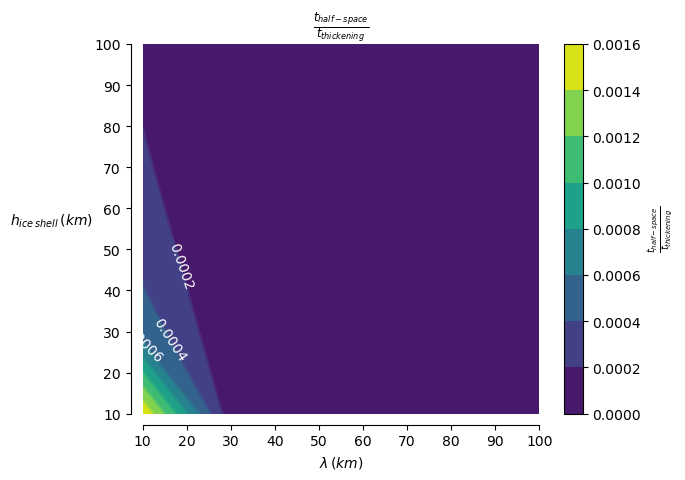

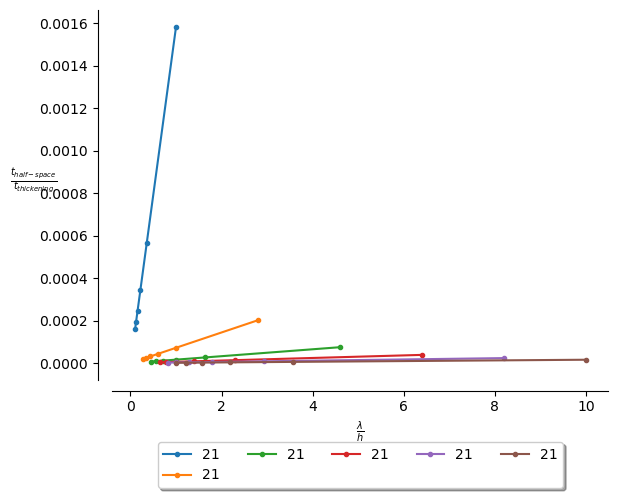

In [36]:
nx = 6
ny = 6
x = range(10.0,100.0,nx)
y = range(10.0,100.0,ny)
# z = zeros(nx,ny)
f(x,y) = get_halfspace_time_viscous(x*1e3)/get_thickening_time(y*1e3)
# z = @.f(x,y')

# figure()
# cs = contour(x,y,z)
# clabel(cs,inline=true,colors="w",fontsize=10)
# contourf(x,y,z)
# colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
# title(L"\frac{t_{half-space}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# # gca().set_xlim([0.0,0.2])
# # gca().set_ylim([1.0,3.0])
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()
# close() # Remove this line to show graph

""" or """

k = [f(i,j) for i in x, j in y]

figure()
cs = contour(x,y,k)
clabel(cs,inline=true,colors="w",fontsize=10)
contourf(x,y,k)
title(L"\frac{t_{half-space}}{t_{thickening}}")
colorbar(label=L"\frac{t_{half-space}}{t_{thickening}}")
gca().set_xlabel(L"\lambda\,(km)")
gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# gca().set_xlim([0.0,0.2])
# gca().set_ylim([1.0,1.7])
gca().yaxis.set_label_coords(-0.23,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
show()

figure()
plot(transpose(x)./y,k,".-",label="21")
gca().set_xlabel(L"\frac{\lambda}{h}")
gca().set_ylabel(L"\frac{t_{half-space}}{t_{thickening}}",rotation=0)
# gca().yaxis.set_label_coords(-0.2,0.5)
gca().spines["top"].set_visible(false) # Hide the top edge of the axis
gca().spines["right"].set_visible(false) # Hide the right edge of the axis
gca().xaxis.set_ticks_position("bottom")
gca().yaxis.set_ticks_position("left")
gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
legend(loc="upper center", bbox_to_anchor=(0.5,-0.15),fancybox="True",shadow="True",ncol=5)
show()

In [ ]:
# Time_vis = vcat(map(x->x',Time_vis)...)

In [ ]:
# Time_halfspace = vcat(map(x->x',Time_halfspace)...)

In [ ]:
# tt = xx/yy
# tt = vcat(map(x->x',tt)...)

In [ ]:
# zz = Time_vis/Time_halfspace
# zz = vcat(map(x->x',zz)...)

In [ ]:
# nlambda = 2
# nhice = 2
# lambda = range(10.0,25.0,nlambda)
# h_ice = range(10.0,25.0,nhice)
# t_halfspace = zeros(nlambda,nhice)
# t_tic = zeros(nlambda,nhice)
# for i in 1:nlambda
#     for j in 1:nhice
#         ths = get_time_viscous(lambda[i]*1e3)
#         t_halfspace[i,j] = ths
#         ttic = get_thickening_time(h_ice[j]*1e3)
#         t_tic[i,j] = ttic
#     end
# end

# figure()
# contourf(t_halfspace./t_tic)
# colorbar(label=L"\frac{t_{halfspace}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# # gca().set_xlim([0.0,0.2])
# # gca().set_ylim([1.0,3.0])
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()

# """ or """
# k = [f(x,y) for x in lambda, y in h_ice]

# figure()
# contourf(k)
# colorbar(label=L"\frac{t_{halfspace}}{t_{thickening}}")
# gca().set_xlabel(L"\lambda")
# gca().set_ylabel(L"h_{ice\,shell}\,(km)",rotation=0)
# # gca().set_xlim([0.0,0.2])
# # gca().set_ylim([1.0,3.0])
# gca().yaxis.set_label_coords(-0.23,0.5)
# gca().spines["top"].set_visible(false) # Hide the top edge of the axis
# gca().spines["right"].set_visible(false) # Hide the right edge of the axis
# gca().xaxis.set_ticks_position("bottom")
# gca().yaxis.set_ticks_position("left")
# gca().spines["left"].set_position(("axes",-0.03)) # Offset the left scale from the axis
# gca().spines["bottom"].set_position(("axes",-0.03)) # Offset the bottom scale from the axis
# show()